# 데이터 사이언스 과정_210722
## 1. Train & Test Data Split
## 2. K-Fold Cross-Validation
## 3. Stratified K-Fold Cross-Validation
## 4. GridSearchCV

## 5. Encoding
## 6. Feature Scaling
## 7. Titanic Dataset EDA
### - Missing Values
### - Binning

In [1]:
# train - train predict (X)
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris_data = load_iris()
dt_clf = DecisionTreeClassifier()

train_data = iris_data.data
train_label = iris_data.target

# train
dt_clf.fit(train_data, train_label)

# test
pred = dt_clf.predict(train_data)
print('예측 정확도 : ', accuracy_score(train_label, pred))

예측 정확도 :  1.0


In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

iris_data = load_iris()
dt_clf = DecisionTreeClassifier()

# train test split
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, 
                                                    test_size=0.3, random_state=20)
print(y_train)

[0 0 0 2 0 2 2 0 2 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 0 2 0 0 1 2 2
 2 2 2 2 1 2 2 2 0 2 0 0 0 2 1 1 2 2 1 0 2 0 1 2 0 1 1 2 0 0 2 2 1 1 1 2 2
 0 2 0 1 0 0 2 2 2 0 0 2 1 1 2 0 2 0 0 2 2 0 0 0 2 1 0 1 2 0 1]


In [5]:
# train
dt_clf.fit(X_train, y_train)

# test
pred = dt_clf.predict(X_test)
print('예측정확도 : ', accuracy_score(y_test, pred))  # answer, predict

예측정확도 :  0.8888888888888888


In [7]:
# accuracy
# random_state 20 -> 21 -> 4, test_size 0.3 -> 0.2

iris_data = load_iris()
dt_clf = DecisionTreeClassifier()

# train test split
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, 
                                                    test_size=0.2, random_state=4)
print(y_train)

# train
dt_clf.fit(X_train, y_train)

# test
pred = dt_clf.predict(X_test)
print('예측정확도 : ', accuracy_score(y_test, pred))  # answer, predict

[1 0 2 0 1 2 2 1 1 0 2 0 1 0 2 0 0 1 1 2 0 1 2 2 1 1 0 1 2 1 0 1 0 1 2 1 2
 1 0 2 2 0 1 2 0 2 1 2 1 0 2 1 2 0 2 1 2 1 2 1 1 2 1 1 2 1 1 0 2 0 1 0 1 1
 1 1 0 2 2 1 1 1 0 0 2 2 0 0 0 2 0 0 2 2 1 0 0 0 2 1 0 0 2 1 2 0 0 2 1 1 1
 2 2 1 2 1 1 2 2 2]
예측정확도 :  0.9666666666666667


In [8]:
## 2d array, np array, pd dataframe

# numpy array -> pandas DataFrame
import pandas as pd

iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df['target']=iris_data.target
iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [9]:
# feature & target df
feature_df = iris_df.iloc[:, :-1]
target_df = iris_df.iloc[:, -1]

# train & test split
X_train, X_test, y_train, y_test = train_test_split(feature_df, target_df, 
                                                    test_size=0.3, random_state=4)

In [10]:
type(X_train)

pandas.core.frame.DataFrame

In [15]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('예측정확도 : {0:0.3f}'.format(accuracy_score(y_test, pred)))

예측정확도 : 0.978


## K-fold CV

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

iris = load_iris()
features = iris.data
label = iris.target

features.shape

(150, 4)

In [17]:
dt_clf = DecisionTreeClassifier(random_state=156)

# 객체 만들고 kfold 적용
kfold = KFold(n_splits=5)
# fold accuracy list
cv_accuracy = []

In [18]:
kfold.split(features)

<generator object _BaseKFold.split at 0x000002136B7FFAC8>

In [19]:
for train_index, test_index in kfold.split(features):
    print(train_index, test_index)

[ 30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 1

In [30]:
import numpy as np

for train_index, test_index in kfold.split(features):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    
    acc = np.round(accuracy_score(y_test, pred), 3)
    
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    
    print('정확도 : %.4f, 학습데이터크기 : %d, 검증데이터크기 : %d' %(acc, train_size, test_size))
    cv_accuracy.append(acc)
    
print('평균 검증 정확도 : ', np.mean(cv_accuracy))

정확도 : 1.0000, 학습데이터크기 : 120, 검증데이터크기 : 30
정확도 : 0.9670, 학습데이터크기 : 120, 검증데이터크기 : 30
정확도 : 0.8670, 학습데이터크기 : 120, 검증데이터크기 : 30
정확도 : 0.9330, 학습데이터크기 : 120, 검증데이터크기 : 30
정확도 : 0.7330, 학습데이터크기 : 120, 검증데이터크기 : 30
평균 검증 정확도 :  0.9


In [ ]:
# imbalanced data problem


## Stratified K-Fold

In [ ]:
# stratified Kfold

In [34]:
iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [35]:
iris_df['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

In [ ]:
'''
kfold = KFold(n_splits=3)

for train_index, test_index in kfold.split(iris_df):
    X_train = features[train_index]
    X_test = features[test_index]
    y_train = label[train_index]
    y_test = label[test_index]
    
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
'''

In [37]:
kfold = KFold(n_splits=3)

n=0
for train_index, test_index in kfold.split(iris_df):
    n += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('[교차검증 : %d]' %n)
    print('학습용 : \n', label_train.value_counts())
    print('검증용 : \n', label_test.value_counts())

[교차검증 : 1]
학습용 : 
 1    50
2    50
Name: label, dtype: int64
검증용 : 
 0    50
Name: label, dtype: int64
[교차검증 : 2]
학습용 : 
 0    50
2    50
Name: label, dtype: int64
검증용 : 
 1    50
Name: label, dtype: int64
[교차검증 : 3]
학습용 : 
 0    50
1    50
Name: label, dtype: int64
검증용 : 
 2    50
Name: label, dtype: int64


In [38]:
dt_clf = DecisionTreeClassifier()

kfold = KFold(n_splits=3)

cv_accuracy = []

n = 0

for train_index, test_index in kfold.split(iris_df):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    # train & predict
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n += 1
    
    # iteration
    acc = np.round(accuracy_score(y_test, pred), 3)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('%d \n정확도 : %f, 학습데이터크기 : %d, 검증데이터크기 : %d' %(n, acc, train_size, test_size))
    
    cv_accuracy.append(acc)
    
print('\n 평균 검증 정확도 : ', np.mean(cv_accuracy))

1 
정확도 : 0.000000, 학습데이터크기 : 100, 검증데이터크기 : 50
2 
정확도 : 0.000000, 학습데이터크기 : 100, 검증데이터크기 : 50
3 
정확도 : 0.000000, 학습데이터크기 : 100, 검증데이터크기 : 50

 평균 검증 정확도 :  0.0


In [40]:
# stratified K-fold label value counts

from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)

n = 0

for train_index, test_index in skf.split(iris_df, iris_df['label']):  # 층 정보
    n = n + 1
    
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('[교차검증 : %d]' %n)
    print('학습용 레이블 분포 : \n', label_train.value_counts())
    print('검증용 레이블 분포 : \n', label_test.value_counts())

[교차검증 : 1]
학습용 레이블 분포 : 
 2    34
0    33
1    33
Name: label, dtype: int64
검증용 레이블 분포 : 
 0    17
1    17
2    16
Name: label, dtype: int64
[교차검증 : 2]
학습용 레이블 분포 : 
 1    34
0    33
2    33
Name: label, dtype: int64
검증용 레이블 분포 : 
 0    17
2    17
1    16
Name: label, dtype: int64
[교차검증 : 3]
학습용 레이블 분포 : 
 0    34
1    33
2    33
Name: label, dtype: int64
검증용 레이블 분포 : 
 1    17
2    17
0    16
Name: label, dtype: int64


In [42]:
# stratifiedKFold CV accuracy

dt_clf = DecisionTreeClassifier(random_state=156)

skfold = StratifiedKFold(n_splits=3)

cv_accuracy = []

n = 0

for train_index, test_index in skf.split(features, label):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    # train & predict
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    
    # iteration accuracy
    n += 1
    
    acc = np.round(accuracy_score(y_test, pred), 3)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('%d \n정확도 : %f, 학습데이터크기 : %d, 검증데이터크기 : %d' %(n, acc, train_size, test_size))
    
    cv_accuracy.append(acc)
    
print('\n 평균 검증 정확도 : ', np.mean(cv_accuracy))

1 
정확도 : 0.980000, 학습데이터크기 : 100, 검증데이터크기 : 50
2 
정확도 : 0.940000, 학습데이터크기 : 100, 검증데이터크기 : 50
3 
정확도 : 0.980000, 학습데이터크기 : 100, 검증데이터크기 : 50

 평균 검증 정확도 :  0.9666666666666667


## cross_val_score()

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris
import numpy as np

iris = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

features = iris.data
label = iris.target

# default: stratified k fold
scores = cross_val_score(dt_clf, features, label, scoring='accuracy', cv=3)
print('교차 검증별 정확도 : ', scores)
print('평균 검증 정확도 : ', np.round(np.mean(scores), 4))

교차 검증별 정확도 :  [0.98 0.94 0.98]
평균 검증 정확도 :  0.9667


## GridSearchCV

In [49]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                   test_size=0.2, random_state=121)

dt_clf = DecisionTreeClassifier()

# hyperparameter - dictionary
# key : DecisionTree hyperparameter
# value : hyperparameter의 값
parameters = {'max_depth': [1, 2, 3], 'min_samples_split' : [2, 3]}

In [50]:
grid_tree = GridSearchCV(dt_clf, param_grid=parameters, cv=3, refit=True, 
                         return_train_score=True)

grid_tree.fit(X_train, y_train)

scores_df = pd.DataFrame(grid_tree.cv_results_)
scores_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.001326,4.657511e-04,0.000665,0.000470,1,2,"{'max_depth': 1, 'min_samples_split': 2}",0.700,0.7,0.70,0.700000,1.110223e-16,5,0.7000,0.7000,0.7000,0.700000,1.110223e-16
1,0.000665,4.703588e-04,0.000665,0.000470,1,3,"{'max_depth': 1, 'min_samples_split': 3}",0.700,0.7,0.70,0.700000,1.110223e-16,5,0.7000,0.7000,0.7000,0.700000,1.110223e-16
2,0.000668,4.723949e-04,0.000662,0.000468,2,2,"{'max_depth': 2, 'min_samples_split': 2}",0.925,1.0,0.95,0.958333,3.118048e-02,3,0.9750,0.9375,0.9625,0.958333,1.559024e-02
3,0.000998,1.123916e-07,0.000665,0.000470,2,3,"{'max_depth': 2, 'min_samples_split': 3}",0.925,1.0,0.95,0.958333,3.118048e-02,3,0.9750,0.9375,0.9625,0.958333,1.559024e-02
4,0.001330,1.243879e-03,0.000665,0.000470,3,2,"{'max_depth': 3, 'min_samples_split': 2}",0.975,1.0,0.95,0.975000,2.041241e-02,1,0.9875,0.9625,0.9875,0.979167,1.178511e-02
5,0.001334,4.733954e-04,0.000000,0.000000,3,3,"{'max_depth': 3, 'min_samples_split': 3}",0.975,1.0,0.95,0.975000,2.041241e-02,1,0.9875,0.9625,0.9875,0.979167,1.178511e-02


In [117]:
# import sklearn
# sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [51]:
grid_tree.cv_results_

{'mean_fit_time': array([0.0013264 , 0.00066519, 0.00066805, 0.00099762, 0.00132966,
        0.00133371]),
 'std_fit_time': array([4.65751140e-04, 4.70358829e-04, 4.72394874e-04, 1.12391596e-07,
        1.24387901e-03, 4.73395364e-04]),
 'mean_score_time': array([0.00066471, 0.00066511, 0.00066161, 0.00066487, 0.00066511,
        0.        ]),
 'std_score_time': array([0.00047002, 0.0004703 , 0.00046785, 0.00047013, 0.0004703 ,
        0.        ]),
 'param_max_depth': masked_array(data=[1, 1, 2, 2, 3, 3],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[2, 3, 2, 3, 2, 3],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1, 'min_samples_split': 2},
  {'max_depth': 1, 'min_samples_split': 3},
  {'max_depth': 2, 'min_samples_split': 2},
  {'max_depth': 2, 'min_samples_split': 3},
  {'ma

In [52]:
scores_df[['params', 'mean_test_score', 'rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1


In [55]:
print('최적 파라미터 : ', grid_tree.best_params_)
print('최고 정확도 : ', grid_tree.best_score_)

최적 파라미터 :  {'max_depth': 3, 'min_samples_split': 2}
최고 정확도 :  0.975


In [57]:
# refit : 'best_estimator_' <- save the best score parameters and fit(train)
best_dt = grid_tree.best_estimator_

pred = best_dt.predict(X_test)
accuracy_score(y_test, pred)

0.9666666666666667

## Encoding

In [58]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder()
items = ['TV', '냉장고', '전자렌지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print(labels)

[0 1 4 5 3 3 2 2]


In [59]:
# 원래 값
encoder.classes_

array(['TV', '냉장고', '믹서', '선풍기', '전자렌지', '컴퓨터'], dtype='<U4')

In [60]:
# decoding
encoder.inverse_transform([3, 0, 2, 1])

array(['선풍기', 'TV', '믹서', '냉장고'], dtype='<U4')

In [61]:
# OneHotEncoder()

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import numpy as np

items = ['TV', '냉장고', '전자렌지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# 1. LabelEncoder()
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
labels

array([0, 1, 4, 5, 3, 3, 2, 2], dtype=int64)

In [62]:
# 2. 2 dim data
labels = labels.reshape(-1, 1) # (, 1) <= -1: all row, 1: 1 column
labels

array([[0],
       [1],
       [4],
       [5],
       [3],
       [3],
       [2],
       [2]], dtype=int64)

In [63]:
# One-Hot Encoding
one_encoder = OneHotEncoder()
one_encoder.fit(labels)
one_labels = one_encoder.transform(labels)
one_labels

<8x6 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [64]:
# sparse matrix
print(one_labels)

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 4)	1.0
  (3, 5)	1.0
  (4, 3)	1.0
  (5, 3)	1.0
  (6, 2)	1.0
  (7, 2)	1.0


In [65]:
one_labels.toarray()

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

In [66]:
''' 개인적으로 추가
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = [['TV'], ['냉장고'], ['전자렌지'], ['컴퓨터'], ['선풍기'], ['선풍기'], ['믹서'], ['믹서']]

oh_encoder = OneHotEncoder(sparse=False)
oh_label = oh_encoder.fit_transform(items)
oh_label
'''

" 개인적으로 추가\nfrom sklearn.preprocessing import OneHotEncoder\nimport numpy as np\n\nitems = [['TV'], ['냉장고'], ['전자렌지'], ['컴퓨터'], ['선풍기'], ['선풍기'], ['믹서'], ['믹서']]\n\noh_encoder = OneHotEncoder(sparse=False)\noh_label = oh_encoder.fit_transform(items)\noh_label\n"

In [67]:
import pandas as pd

df = pd.DataFrame({'item' : ['TV', '냉장고', '전자렌지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']})
df

,item
0,TV
1,냉장고
2,전자렌지
3,컴퓨터
4,선풍기
5,선풍기
6,믹서
7,믹서


In [68]:
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자렌지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


In [69]:
# Pandas DataFrame -> NumPy Array
pd.get_dummies(df).to_numpy()

array([[1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0]], dtype=uint8)

## Feature Scaling
### 1. Standard Scaling | Standardization (Z-scaling)
### 2. Min-max Scaling | Normalizaiton
### (+ Vector Normalization)

In [70]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
print(iris_df.mean())
print(iris_df.std())

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64
sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
dtype: float64


In [71]:
# Standardization (Z-scaling)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)
# print(iris_scaled)

# print(iris_scaled.mean())
# print(iris_scaled.std())

iris_scaled_df = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print(iris_scaled_df.mean())
print(iris_scaled_df.std())

sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64
sepal length (cm)    1.00335
sepal width (cm)     1.00335
petal length (cm)    1.00335
petal width (cm)     1.00335
dtype: float64


In [72]:
# MinMaxScaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)
# print(iris_scaled)

iris_scaled_df = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)

print(iris_scaled_df.min())
print(iris_scaled_df.max())

sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


## Data Distribution Transformation
- sqrt()
- log
- 1/x
- 일반화 박스콕스 (R)

## Titanic Dataset

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [77]:
titanic_df.shape

(891, 12)

In [78]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Missing Values 결측치 파악 및 처리

In [79]:
# Null 값 개수 확인
titanic_df['Age'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [80]:
titanic_df['Age'].isnull().sum()

177

In [81]:
titanic_df['Cabin'].isnull().sum()

687

In [83]:
titanic_df['Embarked'].isnull().sum()

2

In [84]:
# Handling missing Values

titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)

titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [86]:
# 문자열 변수(feature) 빈도 분포 확인 : value_counts()
print('Sex분포 : \n', titanic_df['Sex'].value_counts())
print('\nCabin분포 : \n', titanic_df['Cabin'].value_counts())
print('\nEmbarked분포 : \n', titanic_df['Embarked'].value_counts())

Sex분포 : 
 male      577
female    314
Name: Sex, dtype: int64

Cabin분포 : 
 N              687
G6               4
B96 B98          4
C23 C25 C27      4
E101             3
              ... 
B82 B84          1
E49              1
C148             1
A7               1
C91              1
Name: Cabin, Length: 148, dtype: int64

Embarked분포 : 
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [87]:
# Cabin 값 변경
# str[1:] 첫 번째 문자열만 추출
titanic_df['Cabin'].str[:1]

0      N
1      C
2      N
3      C
4      N
      ..
886    N
887    B
888    N
889    C
890    N
Name: Cabin, Length: 891, dtype: object

In [88]:
# 선실 등급만 표기 (번호 제외)
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]

titanic_df['Cabin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

## EDA

In [89]:
titanic_df['Survived'].count()

891

In [90]:
titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [93]:
titanic_df.groupby('Sex')['Sex'].count()

Sex
female    314
male      577
Name: Sex, dtype: int64

In [94]:
# groupby(data)[name]
titanic_df.groupby('Survived')['Survived'].count()

Survived
0    549
1    342
Name: Survived, dtype: int64

In [101]:
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [114]:
titanic_df.groupby(['Sex']).groups
# titanic_df.groupby(['Sex', 'Survived']).groups

{'female': [1, 2, 3, 8, 9, 10, 11, 14, 15, 18, 19, 22, 24, 25, 28, 31, 32, 38, 39, 40, 41, 43, 44, 47, 49, 52, 53, 56, 58, 61, 66, 68, 71, 79, 82, 84, 85, 88, 98, 100, 106, 109, 111, 113, 114, 119, 123, 128, 132, 133, 136, 140, 141, 142, 147, 151, 156, 161, 166, 167, 172, 177, 180, 184, 186, 190, 192, 194, 195, 198, 199, 205, 208, 211, 215, 216, 218, 229, 230, 233, 235, 237, 240, 241, 246, 247, 251, 254, 255, 256, 257, 258, 259, 264, 268, 269, 272, 274, 275, 276, ...], 'male': [0, 4, 5, 6, 7, 12, 13, 16, 17, 20, 21, 23, 26, 27, 29, 30, 33, 34, 35, 36, 37, 42, 45, 46, 48, 50, 51, 54, 55, 57, 59, 60, 62, 63, 64, 65, 67, 69, 70, 72, 73, 74, 75, 76, 77, 78, 80, 81, 83, 86, 87, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 101, 102, 103, 104, 105, 107, 108, 110, 112, 115, 116, 117, 118, 120, 121, 122, 124, 125, 126, 127, 129, 130, 131, 134, 135, 137, 138, 139, 143, 144, 145, 146, 148, 149, 150, 152, 153, 154, 155, ...]}

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

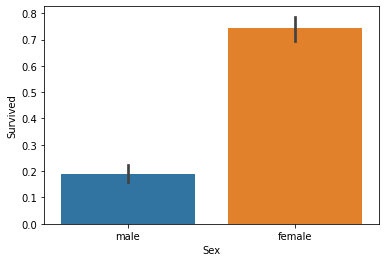

In [102]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

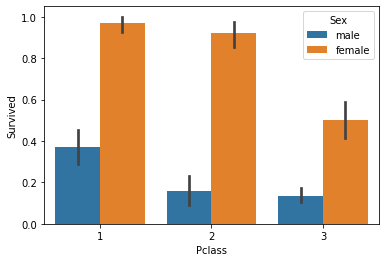

In [103]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

## Data Preprocessing : 구간화(binning)

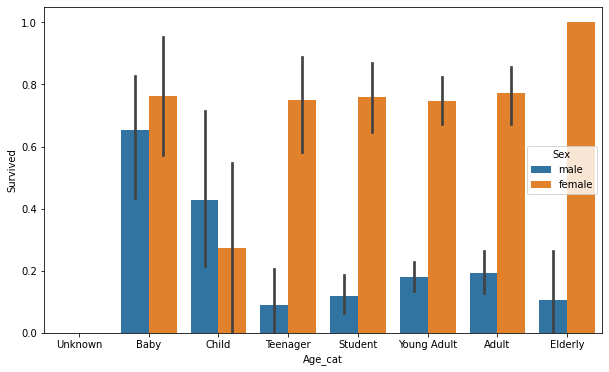

In [110]:
# p.138
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else: cat = 'Elderly'
        
    return cat

plt.figure(figsize=(10, 6))

group_names = ['Unknown', 'Baby', 'Child', 'Teenager','Student','Young Adult','Adult','Elderly']

titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)